In [2]:
import pandas as pd
import os

# Read the Excel file
excel_file = pd.ExcelFile('data/Brain-TR-GammaKnife Clinical Information.xlsx')

# Get the sheet names
sheet_names = excel_file.sheet_names

# Read each sheet into a DataFrame
dfs = {}
for sheet_name in sheet_names:
    dfs[sheet_name] = excel_file.parse(sheet_name)

# Access the DataFrame for a specific sheet
df_cl = dfs['course_level']
df_ll = dfs['lesion_level']
df_ll = df_ll.drop('No.', axis=1)
df_cl = df_cl.rename(columns={'Course #': 'Course'})
df_ll = df_ll.rename(columns={'Treatment Course': 'Course'})



In [3]:
merged_df = df_cl.merge(df_ll, on=['unique_pt_id', 'Course'], how='right')
merged_df.head()


,unique_pt_id,Course,Diagnosis (Only want Mets),Primary Diagnosis,Age at Diagnosis,Gender,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Lesion #,Lesion Location,mri_type,duration_tx_to_imag (months),Fractions,Lesion Name in NRRD files
0,463,1,Brain Mets-Lung,Adenocarcinoma of the lung,60,Male,NaN,NaN,NaN,NaN,1,Lt Frontal,recurrence,10.713112,1,GK.463_1_LLt Frontal
1,463,2,Brain Mets-Lung,Adenocarcinoma of the lung,60,Male,NaN,NaN,NaN,NaN,2,R Motor Cortex,stable,7.952678,1,GK.463_2_LRTMotorCortex
2,463,2,Brain Mets-Lung,Adenocarcinoma of the lung,60,Male,NaN,NaN,NaN,NaN,3,Lt Post Temporal,stable,7.952678,1,GK.463_2_LLtPostTemporal
3,463,2,Brain Mets-Lung,Adenocarcinoma of the lung,60,Male,NaN,NaN,NaN,NaN,4,Lt Lat Cerebellum,stable,7.952678,1,GK.463_2_LLtLatCerebellum
4,158,1,Brain Mets -Lung,Adenocarcinoma of the lung,58,Male,NaN,NaN,NaN,NaN,1,Rt SUP Frontal,stable,1.774565,1,GK.158_1_LRT Sup Frontal


In [4]:
merged_df.columns

Index(['unique_pt_id', 'Course', 'Diagnosis (Only want Mets)',
       'Primary Diagnosis', 'Age at Diagnosis', 'Gender', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Lesion #', 'Lesion Location',
       'mri_type', 'duration_tx_to_imag (months)', 'Fractions',
       'Lesion Name in NRRD files'],
      dtype='object')

In [5]:
merged_df = merged_df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Lesion Name in NRRD files'], axis=1) #, 'unique_pt_id'

In [6]:
merged_df['Diagnosis (Only want Mets)'] = merged_df['Diagnosis (Only want Mets)'].str.replace('Mets', '').str.replace('mets', '').str.replace('Brain', '').str.replace('brain', '').str.replace('-', '').str.strip()


In [7]:
unique_values = merged_df['Diagnosis (Only want Mets)'].unique()
unique_values

array(['Lung', 'Breast', 'GK   2 lesions', 'Renal cell',
       'Lung/Urothelial', 'Uterine', 'Met', 'Kidney',
       'Breast with Large Frontal Met', 'Ovary', 'RCC', 'Urothelial',
       'Endometrial Ca', 'Melanoma', 'Esophageal', 'MetPost op cavity'],
      dtype=object)

In [8]:
unique_values = merged_df['Diagnosis (Only want Mets)'].unique()
unique_values


array(['Lung', 'Breast', 'GK   2 lesions', 'Renal cell',
       'Lung/Urothelial', 'Uterine', 'Met', 'Kidney',
       'Breast with Large Frontal Met', 'Ovary', 'RCC', 'Urothelial',
       'Endometrial Ca', 'Melanoma', 'Esophageal', 'MetPost op cavity'],
      dtype=object)

In [9]:
unique_count = merged_df['Diagnosis (Only want Mets)'].nunique()
unique_count


16

In [10]:
class_counts = merged_df.groupby('Diagnosis (Only want Mets)').size()
class_counts


Diagnosis (Only want Mets)
Breast                           42
Breast with Large Frontal Met     1
Endometrial Ca                    1
Esophageal                        4
GK   2 lesions                    3
Kidney                            2
Lung                             95
Lung/Urothelial                   3
Melanoma                         17
Met                              23
MetPost op cavity                 4
Ovary                             8
RCC                               8
Renal cell                       31
Urothelial                        1
Uterine                           1
dtype: int64

In [11]:
merged_df

,unique_pt_id,Course,Diagnosis (Only want Mets),Primary Diagnosis,Age at Diagnosis,Gender,Lesion #,Lesion Location,mri_type,duration_tx_to_imag (months),Fractions
0,463,1,Lung,Adenocarcinoma of the lung,60,Male,1,Lt Frontal,recurrence,10.713112,1
1,463,2,Lung,Adenocarcinoma of the lung,60,Male,2,R Motor Cortex,stable,7.952678,1
2,463,2,Lung,Adenocarcinoma of the lung,60,Male,3,Lt Post Temporal,stable,7.952678,1
3,463,2,Lung,Adenocarcinoma of the lung,60,Male,4,Lt Lat Cerebellum,stable,7.952678,1
4,158,1,Lung,Adenocarcinoma of the lung,58,Male,1,Rt SUP Frontal,stable,1.774565,1
...,...,...,...,...,...,...,...,...,...,...,...
239,492,2,Lung,Adenocarcinoma of the lung,73,Male,13,Rt temporal,stable,11.501807,1
240,332,1,Lung,Adenocarcinoma of the lung,67,Male,1,Rt Post Temporal,stable,33.749589,1
241,364,1,Esophageal,Esophageal adenocarcinoma,53,Male,1,Rt Occipital,stable,12.060467,1
242,364,1,Esophageal,Esophageal adenocarcinoma,53,Male,2,Rt corpus callo,stable,12.060467,1


In [12]:
merged_df.to_csv('output.csv', index=False)

In [13]:
object_columns = merged_df.select_dtypes(include='object').columns
merged_df[object_columns] = merged_df[object_columns].astype('category')

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   unique_pt_id                  244 non-null    int64   
 1   Course                        244 non-null    int64   
 2   Diagnosis (Only want Mets)    244 non-null    category
 3   Primary Diagnosis             244 non-null    category
 4   Age at Diagnosis              244 non-null    int64   
 5   Gender                        244 non-null    category
 6   Lesion #                      244 non-null    int64   
 7   Lesion Location               244 non-null    category
 8   mri_type                      244 non-null    category
 9   duration_tx_to_imag (months)  244 non-null    float64 
 10  Fractions                     244 non-null    int64   
dtypes: category(5), float64(1), int64(5)
memory usage: 20.1 KB


In [15]:
merged_df.to_csv('output_merged_pd.csv', index=False)

In [16]:
pd.read_csv('output_merged_pd.csv', index_col=0)

,Course,Diagnosis (Only want Mets),Primary Diagnosis,Age at Diagnosis,Gender,Lesion #,Lesion Location,mri_type,duration_tx_to_imag (months),Fractions
unique_pt_id,,,,,,,,,,
463,1,Lung,Adenocarcinoma of the lung,60,Male,1,Lt Frontal,recurrence,10.713112,1
463,2,Lung,Adenocarcinoma of the lung,60,Male,2,R Motor Cortex,stable,7.952678,1
463,2,Lung,Adenocarcinoma of the lung,60,Male,3,Lt Post Temporal,stable,7.952678,1
463,2,Lung,Adenocarcinoma of the lung,60,Male,4,Lt Lat Cerebellum,stable,7.952678,1
158,1,Lung,Adenocarcinoma of the lung,58,Male,1,Rt SUP Frontal,stable,1.774565,1
...,...,...,...,...,...,...,...,...,...,...
492,2,Lung,Adenocarcinoma of the lung,73,Male,13,Rt temporal,stable,11.501807,1
332,1,Lung,Adenocarcinoma of the lung,67,Male,1,Rt Post Temporal,stable,33.749589,1
364,1,Esophageal,Esophageal adenocarcinoma,53,Male,1,Rt Occipital,stable,12.060467,1


In [17]:
merged_df = merged_df.drop('unique_pt_id', axis=1)


In [18]:
from numpy import mean
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import numpy as np

label_encoder = LabelEncoder()


# Assuming 'mri_type' is the column you want to encode
label_mapping = {'stable': 0, 'recurrence': 1}
merged_df['mri_type_encoded'] = merged_df['mri_type'].map(label_mapping)

X, y = merged_df.drop(['mri_type', 'mri_type_encoded'], axis=1), merged_df['mri_type_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = XGBClassifier(tree_method="hist", enable_categorical=True)

# Define grid
weights = range(50,200,10)
param_grid = dict(scale_pos_weight=weights)

# Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

# Execute the grid search
grid_result = grid.fit(X_train, y_train)

# Report the best configuration
print("Best weight: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train the model with the best weight
best_model = grid_result.best_estimator_

# Get probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Find the best threshold for the F1 score
thresholds = np.linspace(0, 1, 101)
f1_scores = [f1_score(y_test, [1 if prob >= threshold else 0 for prob in y_prob]) for threshold in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print("Best training threshold for F1 score: %.2f with F1 score: %.2f" % (best_threshold, best_f1_score))

# Predict probabilities on the test set
y_prob = best_model.predict_proba(X_test)[:, 1]

# Apply the best threshold to get the final predictions
y_pred = [1 if prob >= best_threshold else 0 for prob in y_prob]

# Calculate the F1 score with the best threshold
final_f1_score = f1_score(y_test, y_pred)

print("Final test F1 score on the test set with the best threshold: %.2f" % final_f1_score)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc

# Get the probabilities of the positive class
y_scores = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute the area under the precision-recall curve
precision_recall_auc = auc(recall, precision)

print("Precision-Recall AUC: {:.2f}".format(precision_recall_auc))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate sensitivity (recall) and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Create a DataFrame with the scores
scores_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'F1-score'],
    'New': ['{:.2f}%'.format(accuracy * 100), 
              '{:.2f}%'.format(sensitivity * 100), 
              '{:.2f}%'.format(specificity * 100), 
              '{:.2f}%'.format(final_f1_score * 100)],
    'Old': ['90.10%', '10.00%', '89.00%', '18.20%']
})

# Set the index to the 'Metric' column for a cleaner display
scores_df.set_index('Metric', inplace=True)

# Display the DataFrame
print(scores_df)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

Best weight: 0.166190 using {'scale_pos_weight': 150}
Best training threshold for F1 score: 0.04 with F1 score: 0.60
Final test F1 score on the test set with the best threshold: 0.60
Precision-Recall AUC: 0.33
                New     Old
Metric                     
Accuracy     91.84%  90.10%
Sensitivity  75.00%  10.00%
Specificity  93.33%  89.00%
F1-score     60.00%  18.20%
[[42  3]
 [ 1  3]]


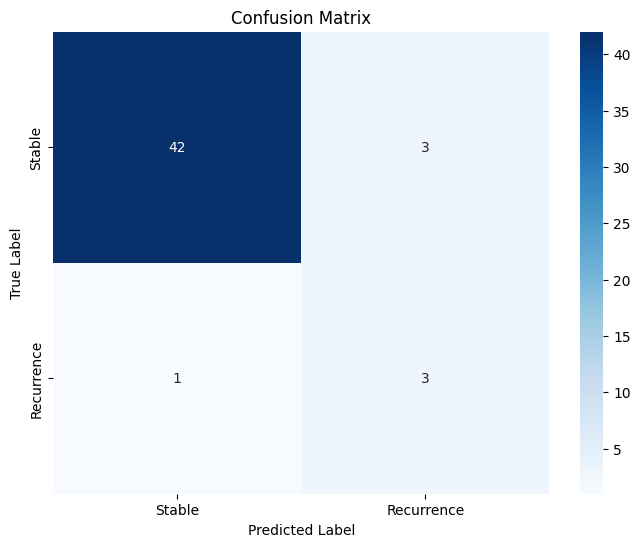

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Stable', 'Recurrence'], yticklabels=['Stable', 'Recurrence'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

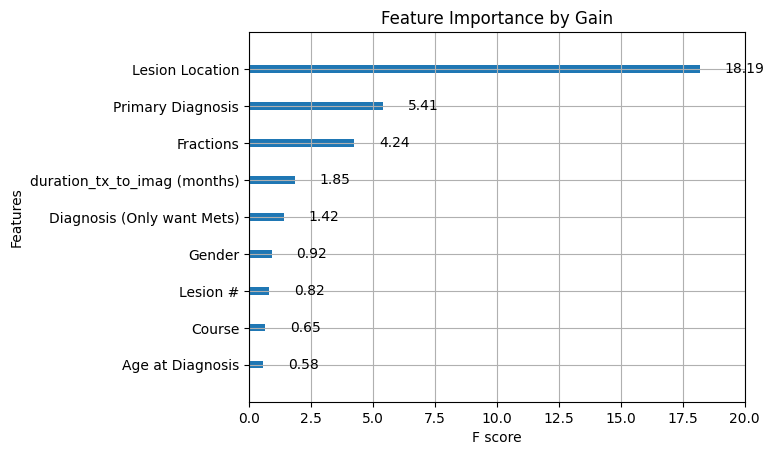

In [20]:
# Plot feature importance
import xgboost as xgb
xgb.plot_importance(best_model,title="Feature Importance by Gain", importance_type="gain",values_format='{v:.2f}')
plt.show()

**Gain**: This measure is often considered the most informative in imbalanced datasets. It represents the average gain of splits that use the feature, which can indicate how much the feature contributes to the model's ability to make accurate predictions. In the context of cancer recurrence prediction, where the goal is often to identify the most predictive features, gain can be particularly useful.